In [17]:
import yfinance as yf
import pandas as pd

# Fetch 5 years of Apple stock data
ticker = "AAPL"
data = yf.download(ticker, start="2018-01-01", end="2023-12-31", auto_adjust=True)

# Save to CSV
data.to_csv("../data/aapl_stock.csv")

# Quick look
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.380997,40.390375,39.677740,39.888719,102223600
2018-01-03,40.373959,40.917812,40.310668,40.444285,118071600
2018-01-04,40.561493,40.664638,40.338796,40.446626,89738400
2018-01-05,41.023315,41.110049,40.566199,40.657622,94640000
2018-01-08,40.870930,41.166296,40.772471,40.870930,82271200


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV, ensure Date is parsed correctly
df = pd.read_csv("../data/aapl_stock.csv")

# If Date exists as a column, convert it
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)
else:
    # If it's the first unnamed column (from yfinance save)
    df.index = pd.to_datetime(df.index)
    df.index.name = "Date"

df.head()


,Price,Close,High,Low,Open,Volume
Date,,,,,,
1970-01-01 00:00:00.000000000,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1970-01-01 00:00:00.000000001,Date,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000000002,2018-01-02,40.38099670410156,40.390375462792754,39.67774003409455,39.888719181265685,102223600
1970-01-01 00:00:00.000000003,2018-01-03,40.373958587646484,40.91781205077507,40.31066807189711,40.44428495987144,118071600
1970-01-01 00:00:00.000000004,2018-01-04,40.561492919921875,40.66463778519239,40.33879573005931,40.44662639688012,89738400


In [10]:
# Shape, datatypes, and missing values
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
df.describe()


Shape: (1511, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1511 entries, Ticker to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1510 non-null   object
 1   High    1510 non-null   object
 2   Low     1510 non-null   object
 3   Open    1510 non-null   object
 4   Volume  1510 non-null   object
dtypes: object(5)
memory usage: 70.8+ KB
None

Missing values:
 Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64


,Close,High,Low,Open,Volume
count,1510,1510,1510,1510,1510
unique,1494,1510,1510,1510,1506
top,44.456512451171875,AAPL,AAPL,AAPL,118655600
freq,2,1,1,1,2


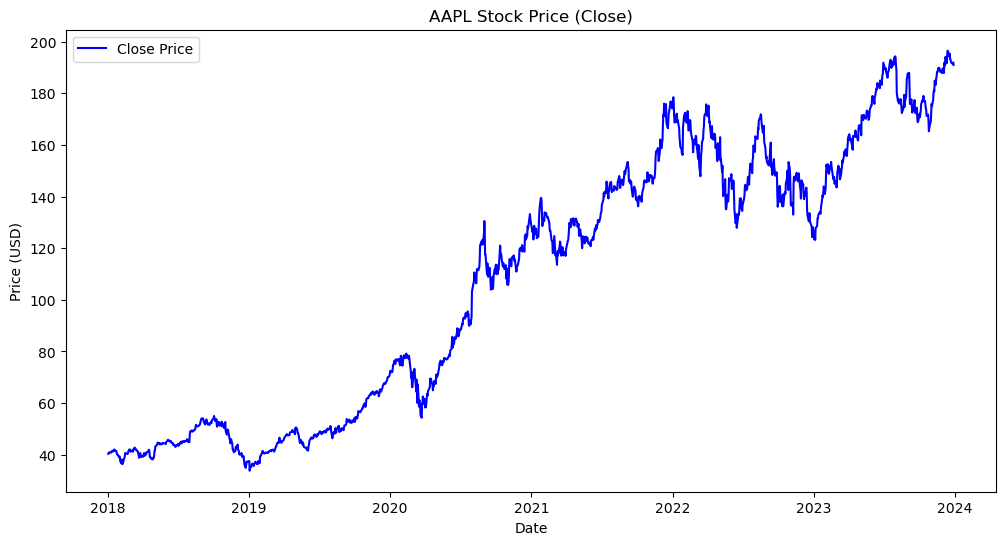

In [25]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data[("Close", "AAPL")], label="Close Price", color="blue")
plt.title("AAPL Stock Price (Close)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [27]:
# Select features for prediction
df = data[["Open", "High", "Low", "Close", "Volume"]]["Close","AAPL"].copy()

# Drop rows with missing values
df = df.dropna()

df.head()


Date
2018-01-02    40.380997
2018-01-03    40.373959
2018-01-04    40.561493
2018-01-05    41.023315
2018-01-08    40.870930
Name: (Close, AAPL), dtype: float64

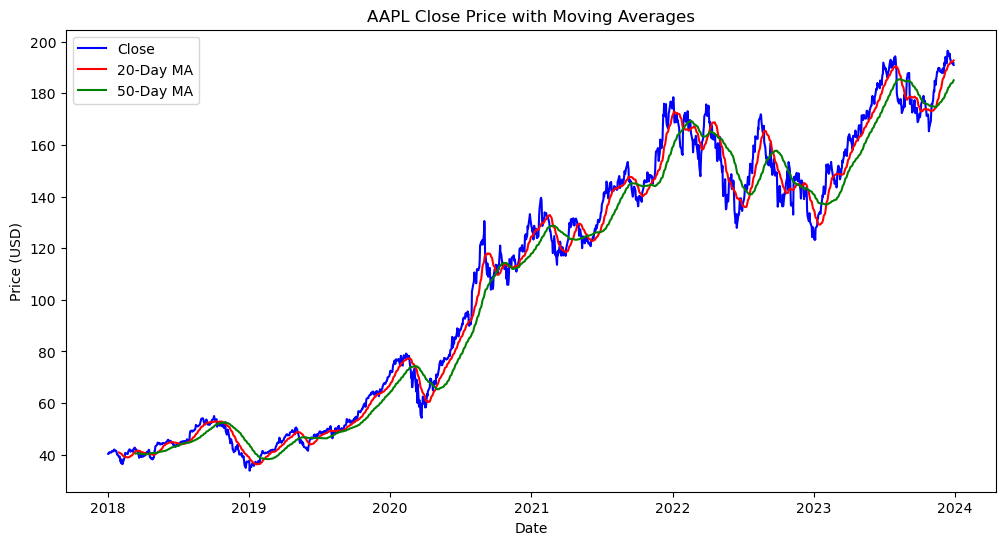

In [33]:
# Calculate moving averages for the Series
ma20 = df.rolling(20).mean()
ma50 = df.rolling(50).mean()

plt.figure(figsize=(12,6))
plt.plot(df.index, df, label="Close", color="blue")
plt.plot(df.index, ma20, label="20-Day MA", color="red")
plt.plot(df.index, ma50, label="50-Day MA", color="green")
plt.title("AAPL Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


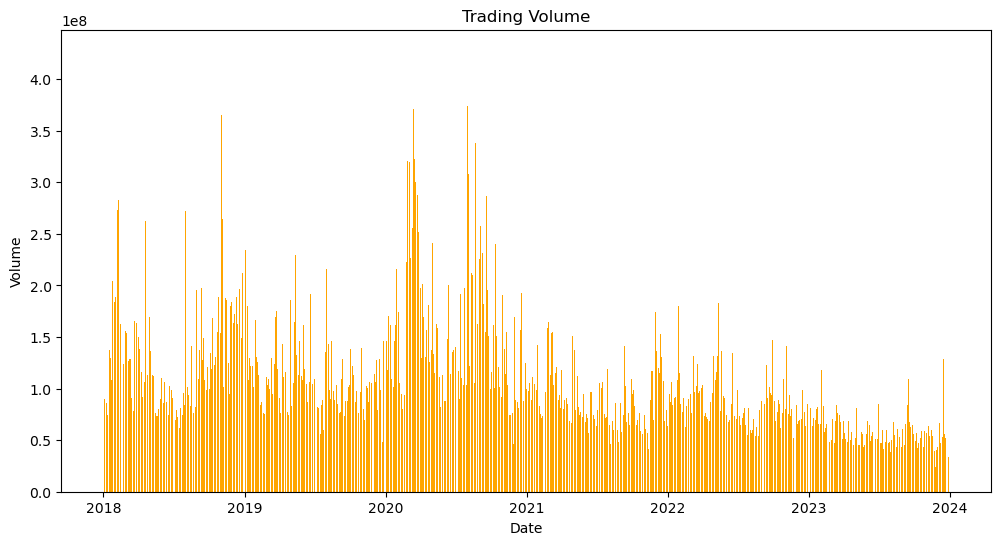

In [35]:
plt.figure(figsize=(12,6))
plt.bar(data.index, data[("Volume", "AAPL")], width=1.0, color="orange")
plt.title("Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


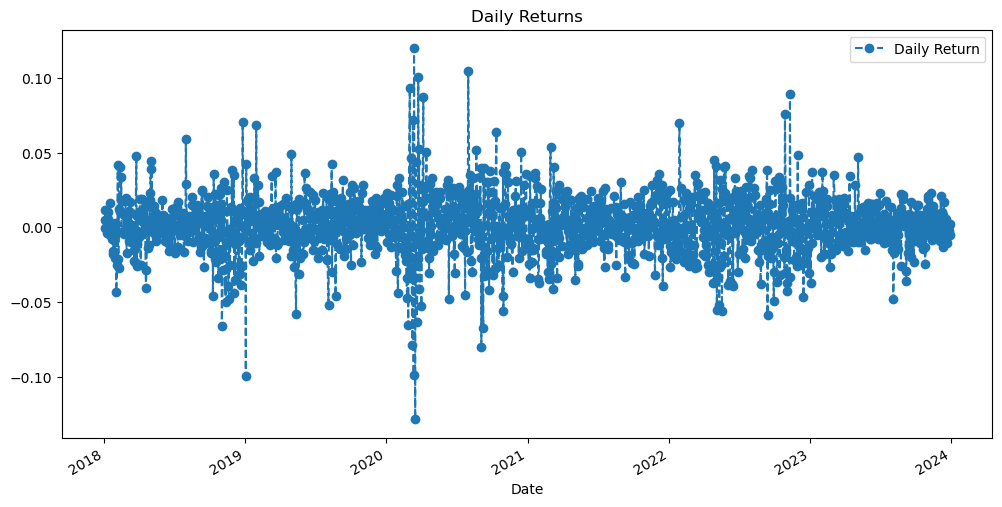

In [38]:
daily_return = df.pct_change()

plt.figure(figsize=(12,6))
daily_return.plot(label="Daily Return", legend=True, linestyle="--", marker="o")
plt.title("Daily Returns")
plt.show()


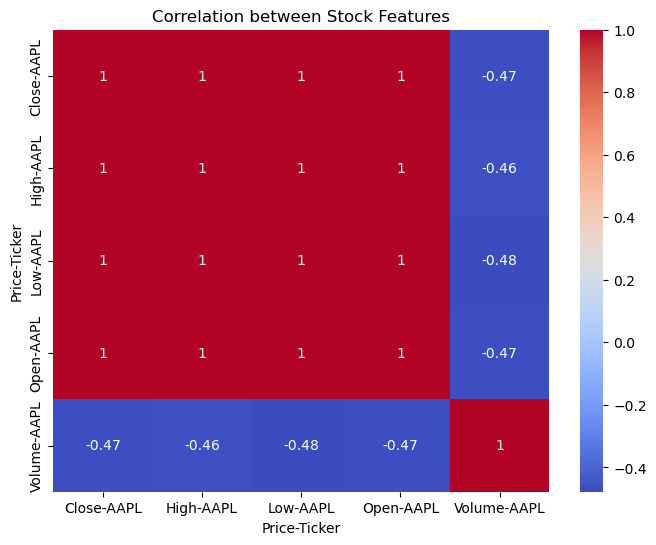

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Stock Features")
plt.show()
